In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/karthi_krish/MachineLearning/datasets/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Preprocessing

In [3]:
target = data['target']
target.value_counts()

1    165
0    138
Name: target, dtype: int64

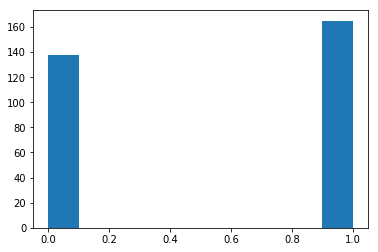

In [4]:
plt.hist(target)
plt.show()

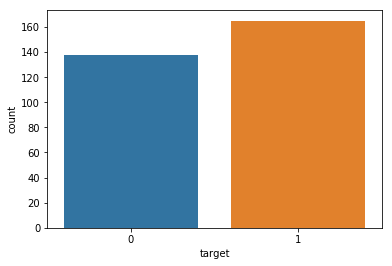

In [5]:
import seaborn as sns
sns.countplot(target)

##### help(sns.countplot)

In [6]:
print("Number of Heart disease patients in dataset {} \nNumber of normal records {}".format(target.value_counts()[0],target.value_counts()[1]))

Number of Heart disease patients in dataset 138 
Number of normal records 165


In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


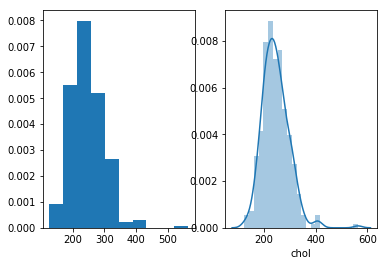

In [8]:
plt.subplot(1,2,1)
plt.hist(data['chol'],density = True)
plt.subplot(1,2,2)
sns.distplot(data['chol'])
plt.show()

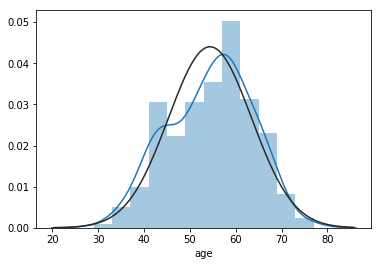

In [9]:
from scipy.stats import norm
sns.distplot(data['age'],fit = norm)
plt.show()

In [10]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

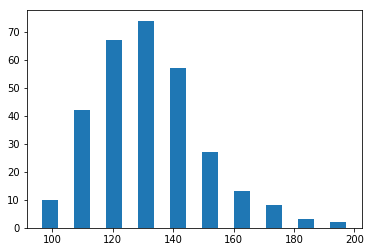

In [11]:
plt.hist(data['trestbps'],rwidth = 0.5)
plt.show()

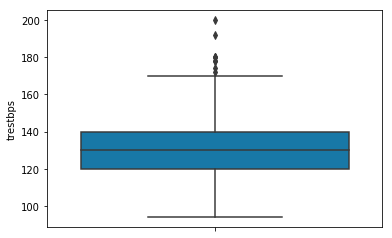

In [12]:
_ = sns.boxplot(data['trestbps'],palette = 'winter',orient = 'v')
plt.show()

In [13]:
trestbps = data['trestbps']
mean = np.mean(trestbps)
median = np.median(trestbps)

In [14]:
mean

131.62376237623764

In [15]:
np.std(trestbps)

17.509178065734393

In [16]:
from statistics import mode
max_count = 0
for i in trestbps:
    if i == mode(trestbps):
        max_count+=1
print("Most repeated term is {} and it appears {} times ".format(mode(trestbps),max_count)) 

Most repeated term is 120 and it appears 37 times 


In [17]:
data[data.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [18]:
data.drop_duplicates(inplace = True)

In [19]:


no_hd_pat = data[data['target'] == 0]
hd_pat = data[data['target'] == 1][:138]
b_data = pd.concat([no_hd_pat,hd_pat])

In [20]:
corr_data = data.corr()
corr_b = b_data.corr()
corr_b

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.079477,-0.042851,0.280216,0.222249,0.129027,-0.105099,-0.366832,0.091349,0.196778,-0.160560,0.350612,0.064975,-0.246851
sex,-0.079477,1.000000,-0.034501,-0.073954,-0.209800,0.039489,-0.037639,-0.064771,0.129426,0.103154,-0.047411,0.109463,0.211083,-0.290386
cp,-0.042851,-0.034501,1.000000,0.019444,-0.071172,0.113259,0.033625,0.281987,-0.386772,-0.124274,0.113520,-0.207570,-0.175268,0.441706
trestbps,0.280216,-0.073954,0.019444,1.000000,0.123892,0.182896,-0.085995,-0.046623,0.078464,0.198371,-0.141888,0.114953,0.056881,-0.150656
chol,0.222249,-0.209800,-0.071172,0.123892,1.000000,-0.002967,-0.120498,-0.010786,0.047799,0.032145,0.003918,0.098264,0.084608,-0.054318
fbs,0.129027,0.039489,0.113259,0.182896,-0.002967,1.000000,-0.065854,-0.000828,0.003796,-0.014670,-0.057184,0.145833,-0.050140,0.009808
restecg,-0.105099,-0.037639,0.033625,-0.085995,-0.120498,-0.065854,1.000000,0.043877,-0.050954,-0.035207,0.112293,-0.091149,0.016850,0.097307
thalach,-0.366832,-0.064771,0.281987,-0.046623,-0.010786,-0.000828,0.043877,1.000000,-0.369254,-0.339237,0.388359,-0.242165,-0.094653,0.439060
exang,0.091349,0.129426,-0.386772,0.078464,0.047799,0.003796,-0.050954,-0.369254,1.000000,0.272240,-0.256947,0.124821,0.200112,-0.417398
oldpeak,0.196778,0.103154,-0.124274,0.198371,0.032145,-0.014670,-0.035207,-0.339237,0.272240,1.000000,-0.605628,0.257757,0.220838,-0.414159


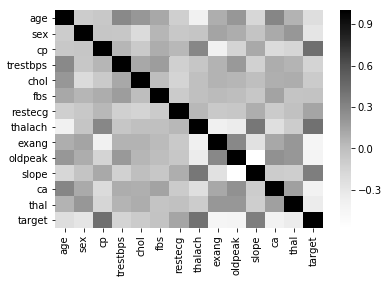

In [21]:
sns.heatmap(corr_data,cmap = 'Greys')

In [22]:
x = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.log(x)

/home/karthi_krish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [23]:
"""f,ax = plt.subplots(4,1,figsize = (20,24))
ax[0].plot(x,y1)
ax[1].plot(x,y2)
ax[2].plot(x,y3)
ax[3].plot(x,y4)
ax[0].set_title('0')
ax[1].set_title('1')
ax[2].set_title('2')
ax[3].set_title('3')"""

"f,ax = plt.subplots(4,1,figsize = (20,24))\nax[0].plot(x,y1)\nax[1].plot(x,y2)\nax[2].plot(x,y3)\nax[3].plot(x,y4)\nax[0].set_title('0')\nax[1].set_title('1')\nax[2].set_title('2')\nax[3].set_title('3')"

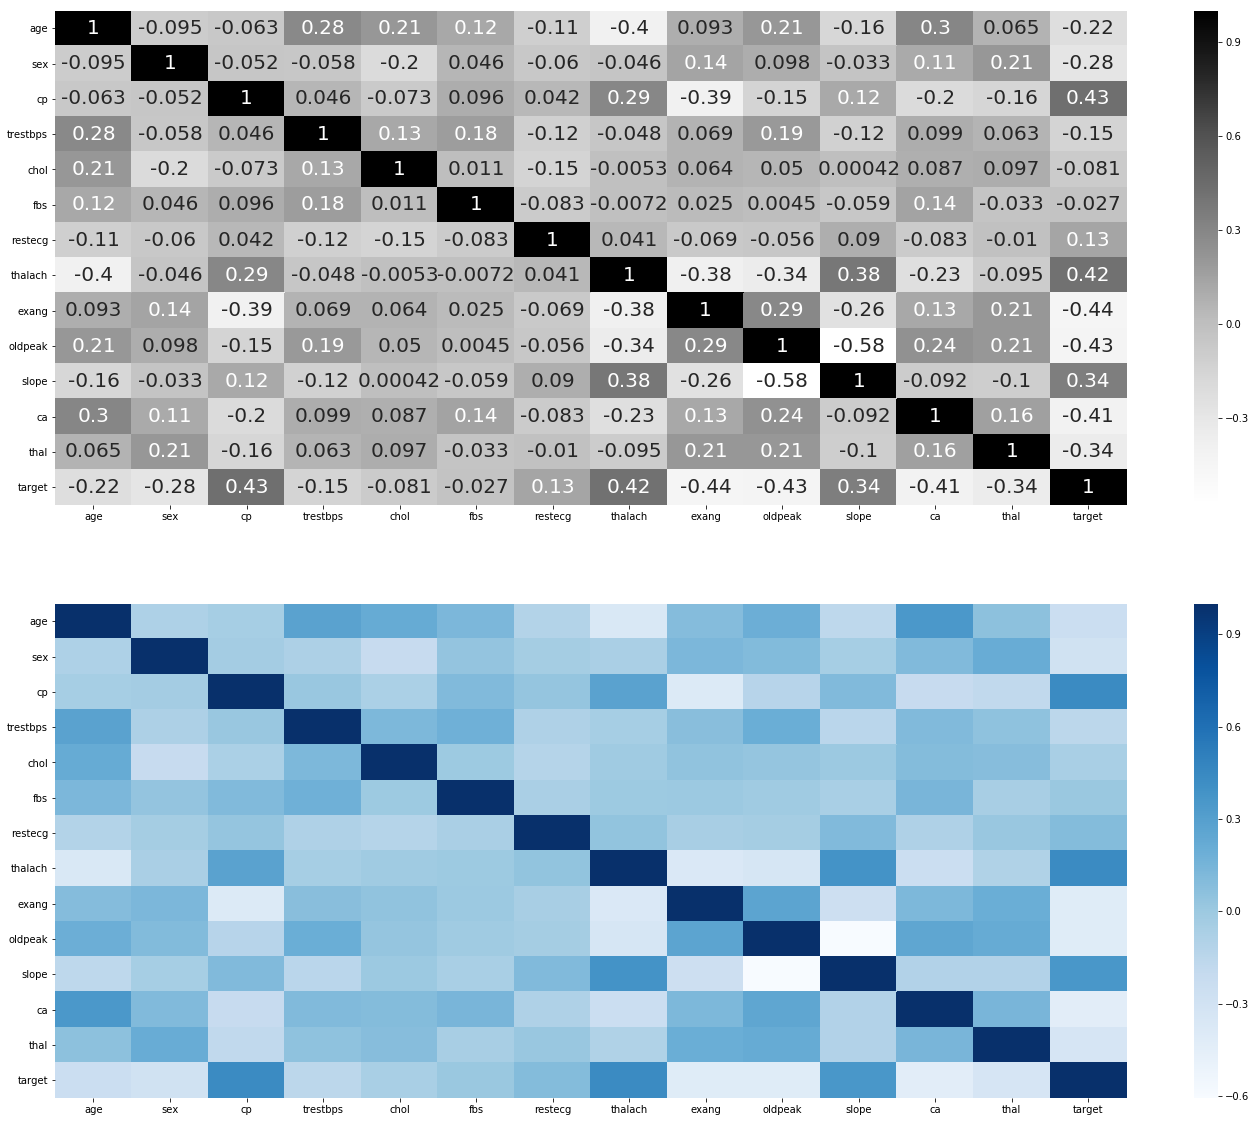

In [24]:
ax = np.array((2,1))
f,ax = plt.subplots(2,1,figsize = (24,20))
sns.heatmap(corr_data,annot = True,annot_kws = {'size':20},cmap = 'Greys',ax = ax[0])
sns.heatmap(corr_b,annot_kws = {'size':20},cmap = 'Blues',ax = ax[1])

In [25]:
pos_corr = list(corr_data
                [corr_data['target'] >= 0]['target'].index)
neg_corr = list(corr_data[corr_data['target'] <= 0]['target'].index)

In [26]:

pos_corr

['cp', 'restecg', 'thalach', 'slope', 'target']

In [27]:
neg_corr

['age', 'sex', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'ca', 'thal']

In [28]:
#positive correlator box plots
data[pos_corr].columns

Index(['cp', 'restecg', 'thalach', 'slope', 'target'], dtype='object')

In [29]:
def draw_box_plot(col,ax):
    _ = sns.boxplot(x = 'target',y = col,data = data,ax = ax)
    ax.set_title("{} vs Target BoxPlot".format(col),fontsize = 14)

In [30]:
"""ax = []*len(pos_corr)
f,ax = plt.subplots(len(pos_corr),1,figsize = (8,20))
for i,col in enumerate(pos_corr):
    draw_box_plot(col,ax[i])"""

'ax = []*len(pos_corr)\nf,ax = plt.subplots(len(pos_corr),1,figsize = (8,20))\nfor i,col in enumerate(pos_corr):\n    draw_box_plot(col,ax[i])'

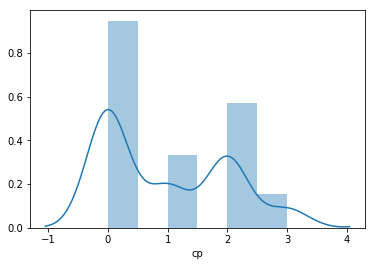

In [31]:

sns.distplot(data['cp'])
plt.show()

In [32]:
from scipy.stats import uniform,norm
n = 10000
start = 1
width = 3
data_uniform = uniform.rvs(size = n,loc = start,scale = width)

In [33]:
import numpy as np
data_uniform_np = np.linspace(1,5,10000)
data_uniform_np

array([1.        , 1.00040004, 1.00080008, ..., 4.99919992, 4.99959996,
       5.        ])

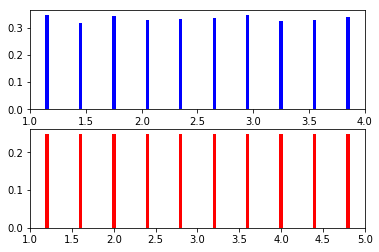

In [34]:
f,(ax1,ax2) = plt.subplots(2,1)
ax1.hist(data_uniform,color = 'blue',rwidth = 0.1,density = 'True')
ax2.hist(data_uniform_np,color = 'red',rwidth = 0.1,density = 'True')
plt.show()

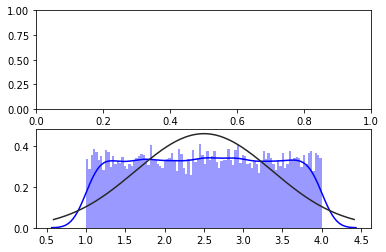

"ax2 = sns.distplot(data_uniform,bins = 100,color = 'blue',kde = True)\n#ax2 = sns.distplot(data_uniform_np,bins = 100,color = 'red',kde = True)\nplt.show()"

In [35]:

f,(ax1,ax2) = plt.subplots(2,1)
ax1 = sns.distplot(data_uniform,bins = 100,color = 'blue',fit = norm,kde = True)
plt.show()
"""ax2 = sns.distplot(data_uniform,bins = 100,color = 'blue',kde = True)
#ax2 = sns.distplot(data_uniform_np,bins = 100,color = 'red',kde = True)
plt.show()"""

In [36]:
pos_corr

['cp', 'restecg', 'thalach', 'slope', 'target']

In [37]:
neg_corr

['age', 'sex', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'ca', 'thal']

In [38]:
pos_corr = list(corr_b[corr_b['target'] >= 0]['target'].index)
pos_corr.remove('target')

In [39]:
pos_corr

['cp', 'fbs', 'restecg', 'thalach', 'slope']

In [40]:
neg_corr = list(corr_b[corr_b['target'] <= 0]['target'].index)
neg_corr

['age', 'sex', 'trestbps', 'chol', 'exang', 'oldpeak', 'ca', 'thal']

In [41]:
def draw_box_plot(col,ax):
    _ = sns.boxplot(x = 'target',y = col,data = data,ax = ax)
    ax.set_title("{} vs Target BoxPlot".format(col),fontsize = 14)

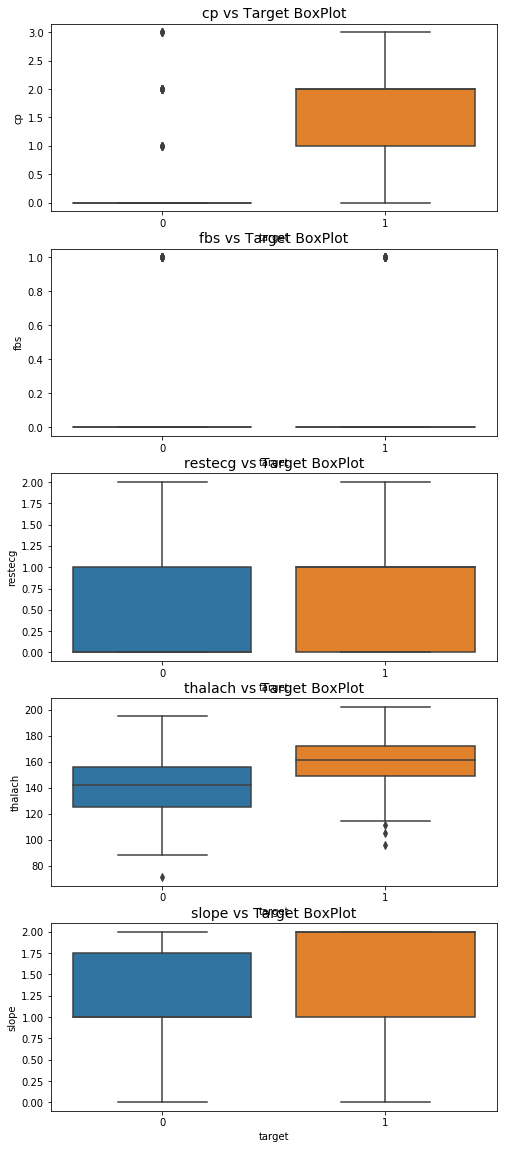

In [42]:
ax = []*len(pos_corr)
f,ax = plt.subplots(len(pos_corr),1,figsize = (8,20))
for i,col in enumerate(pos_corr):
    draw_box_plot(col,ax[i])

In [43]:
X = b_data.iloc[:,:-1].values
Y = b_data.loc[:,['target']].values

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [45]:
Y_train.shape

(220, 1)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100,max_depth = 5)
rf_classifier = rf_classifier.fit(X_train,Y_train)
y_pred = rf_classifier.predict(X_test)

/home/karthi_krish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
conf = cm(Y_test,y_pred)
report = classification_report(Y_test,y_pred)
conf

array([[18,  8],
       [ 4, 26]])

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[1,500],'max_depth':[1,15]}
clf = GridSearchCV(rf_classifier,parameters,cv = 5)
clf.fit(X_train,Y_train)
clf.best_params_

/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/karthi_krish/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528:

{'max_depth': 15, 'n_estimators': 500}

In [49]:
rf_classifier_best = RandomForestClassifier(n_estimators = 500,max_depth = 15)
rf_classifier_best = rf_classifier_best.fit(X_train,Y_train)
y_pred_best = rf_classifier_best.predict(X_test)

/home/karthi_krish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [50]:
from sklearn.metrics import confusion_matrix as cm
conf_best = cm(Y_test,y_pred_best)
conf_best

array([[19,  7],
       [ 4, 26]])

In [51]:
import warnings
warnings.filterwarnings("ignore")


In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[1,10,100,200,400,500],'max_depth':[1,5,10,15]}
clf = GridSearchCV(rf_classifier,parameters,cv = 5)
clf.fit(X_train,Y_train)
clf.best_params_

{'max_depth': 15, 'n_estimators': 200}

In [53]:
rf_classifier_best = RandomForestClassifier(**clf.best_params_)
rf_classifier_best = rf_classifier_best.fit(X_train,Y_train)
y_pred_best = rf_classifier_best.predict(X_test)
conf_best = cm(Y_test,y_pred_best)
conf_best

array([[19,  7],
       [ 4, 26]])

In [54]:
classification_report(Y_test,y_pred_best)

'              precision    recall  f1-score   support\n\n           0       0.83      0.73      0.78        26\n           1       0.79      0.87      0.83        30\n\n   micro avg       0.80      0.80      0.80        56\n   macro avg       0.81      0.80      0.80        56\nweighted avg       0.81      0.80      0.80        56\n'

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import cross_val_score

In [57]:
import warnings
warnings.filterwarnings('ignore')
for name,classifier in classifiers.items():
    classifier.fit(X_train,Y_train)
    training_score = cross_val_score(classifier,X_train,Y_train,cv = 5)
    print("Classifier {}  has Training Score of {}".
          format(classifier.__class__.__name__,round(training_score.mean(),2)))
    

Classifier LogisticRegression  has Training Score of 0.86
Classifier KNeighborsClassifier  has Training Score of 0.65
Classifier SVC  has Training Score of 0.51
Classifier DecisionTreeClassifier  has Training Score of 0.78


In [78]:
from sklearn.model_selection import GridSearchCV
classifier = classifiers["LogisticRegression"]
parameters = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100,1000]}
log_clf = GridSearchCV(classifier,parameters,cv = 5)
log_clf.fit(X_train,Y_train)
Logistic_params = log_clf.best_params_
Logistic_params

{'C': 1, 'penalty': 'l1'}

In [86]:
log_classifier = LogisticRegression(C = 1,penalty = 'l1')
log_classifier.fit(X_train,Y_train)
log_classifier.predict(X_test)
training_score = cross_val_score(log_classifier,X_train,Y_train,cv = 5)
round(training_score.mean(),2)

0.86

In [91]:
classifier = classifiers["KNearest"]
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knears_clf = GridSearchCV(classifier, knears_params)
knears_clf.fit(X_train, Y_train)
# KNears best estimator
knears_neighbors = knears_clf.best_estimator_
knears_neighbors.fit(X_train,Y_train)
training_score = cross_val_score(knears_neighbors,X_train,Y_train,cv = 5)
round(training_score.mean(),2)

0.65

In [97]:
svc_params = {'C': [0.5,1], 'kernel': ['rbf','linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, Y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
training_score = cross_val_score(svc,X_train,Y_train,cv = 5)
round(training_score.mean(),2)

0.86

In [98]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, Y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
training_score = cross_val_score(tree_clf,X_train,Y_train,cv = 5)
round(training_score.mean(),2)

0.81

In [100]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [101]:
model=Sequential()
model.add(Dense(128, init="uniform", input_dim=13, activation='relu'))
model.add(Dense(64, init ="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer='adam')
model.summary()
history=model.fit(X_train,Y_train, epochs=100, batch_size=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
220/220 [==============================] - 1s 5ms/step - loss: 0.6907 - acc: 0.5273
Epoch 2/100
220/220 [==============================] - 0s 43us/step - loss: 0.6709 - acc: 0.6091
Epoch 3/100
220/220 [==============================] - 0s 43us/step - loss: 0.6616 - acc: 0.6091
Epoch 4/100
220/220 [==============================] - 0s 59us/step - loss: 0.6630 - acc: 0.5909
Epoch 5/100
220

220/220 [==============================] - 0s 37us/step - loss: 0.3915 - acc: 0.8182
Epoch 78/100
220/220 [==============================] - 0s 62us/step - loss: 0.5202 - acc: 0.7591
Epoch 79/100
220/220 [==============================] - 0s 55us/step - loss: 0.4008 - acc: 0.8364
Epoch 80/100
220/220 [==============================] - 0s 63us/step - loss: 0.3957 - acc: 0.8227
Epoch 81/100
220/220 [==============================] - 0s 46us/step - loss: 0.4128 - acc: 0.8182
Epoch 82/100
220/220 [==============================] - 0s 50us/step - loss: 0.4060 - acc: 0.8000
Epoch 83/100
220/220 [==============================] - 0s 35us/step - loss: 0.3822 - acc: 0.8500
Epoch 84/100
220/220 [==============================] - 0s 33us/step - loss: 0.3954 - acc: 0.8182
Epoch 85/100
220/220 [==============================] - 0s 37us/step - loss: 0.3947 - acc: 0.7955
Epoch 86/100
220/220 [==============================] - 0s 41us/step - loss: 0.3702 - acc: 0.8455
Epoch 87/100
220/220 [===========

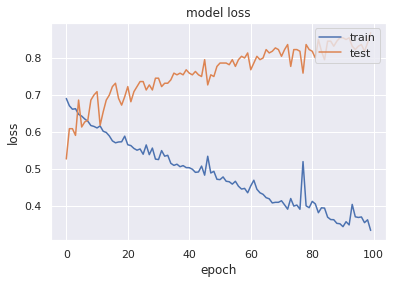

In [110]:
sns.set()
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['acc'],label = 'Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
